# **🍽️ Restaurant Tips Analysis**

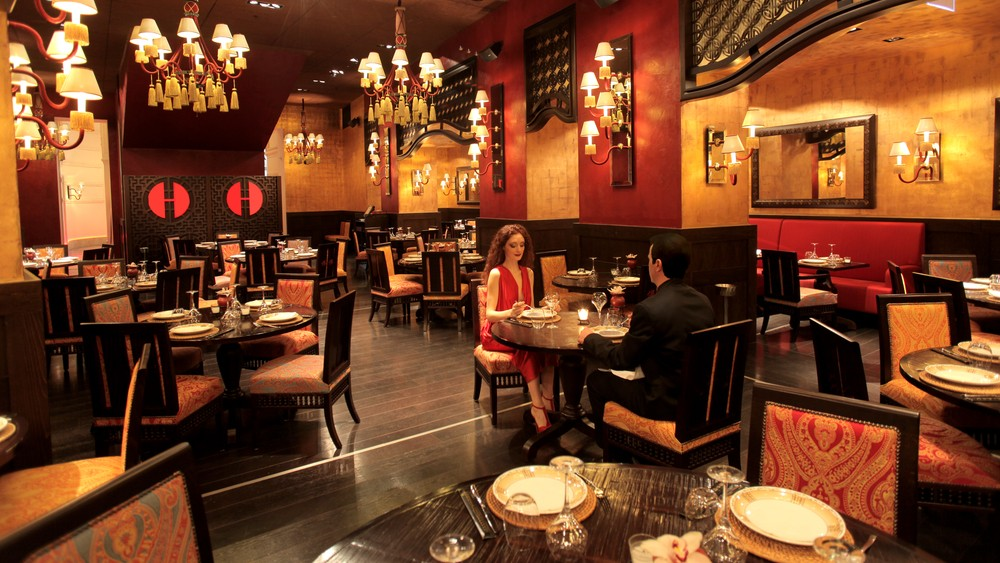

This project aims to use the restaurant tips dataset to practice creating composition plots and visualizations. We will examine the relationship between different variables and the tips given.

The dataset consists of information from 244 restaurant bills, collected in the US in 1987.

It includes details about the tips given to restaurant staff, such as the total bill, tip amount, gender of the person paying, smoking status, day of the week, time of day, and party size.

## **👣 The First Steps**

### **📥 Data import**

First, let's import the needed libraries: Pandas & Matplotlib.

In [7]:
# PUT YOUR CODE HERE
import pandas as pd
import matplotlib.pyplot as plt

Then load data from the following link: https://raw.githubusercontent.com/RusAbk/sca_datasets/main/tips.csv

In [8]:
# PUT YOUR CODE HERE
df = pd.read_csv('https://raw.githubusercontent.com/RusAbk/sca_datasets/main/tips.csv')

### **🔍 Data exploration**

#### **Test sample**

Let's take a look at the first 5 rows to be sure, that data is loaded properly:

In [ ]:
# PUT YOUR CODE HERE
df.head()

,id,total_bill,tip,sex,smoker,day,time,size
0,0,16.99,1.01,Female,No,Sun,Dinner,2
1,1,10.34,1.66,Male,No,Sun,Dinner,3
2,2,21.01,3.50,Male,No,Sun,Dinner,3
3,3,23.68,3.31,Male,No,Sun,Dinner,2
4,4,24.59,3.61,Female,No,Sun,Dinner,4


> 🎉 Great! It seems to be okay.

As you can see each observation represents a customer who left a tip at a restaurant.

We can see information about:
* the day it occurred
* if it was at lunch or dinner
* the total bill
* the sex of the person
* if they were a smoker or not
* the size of the party

Before continuing take a look at a few rows of the data and use `info` and `describe` to analyze dataset column types and values.

#### **Column types checking**

Show the columns of the dataframe and their types:

In [ ]:
# PUT YOUR CODE HERE
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          244 non-null    int64  
 1   total_bill  244 non-null    float64
 2   tip         244 non-null    float64
 3   sex         244 non-null    object 
 4   smoker      244 non-null    object 
 5   day         244 non-null    object 
 6   time        244 non-null    object 
 7   size        244 non-null    int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 15.4+ KB


> **Ooops... 🤔**
>
> We have string columns considered as objects.

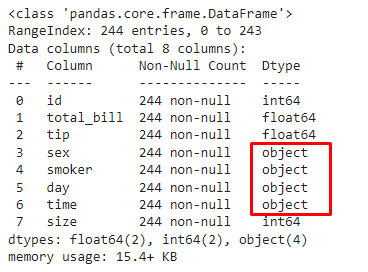

Let's fix their types and make them string:

In [9]:
# PUT YOUR CODE HERE
df = df.convert_dtypes()

Check again (output columns and their types):

In [ ]:
# PUT YOUR CODE HERE
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          244 non-null    Int64  
 1   total_bill  244 non-null    Float64
 2   tip         244 non-null    Float64
 3   sex         244 non-null    string 
 4   smoker      244 non-null    string 
 5   day         244 non-null    string 
 6   time        244 non-null    string 
 7   size        244 non-null    Int64  
dtypes: Float64(2), Int64(2), string(4)
memory usage: 16.3 KB


Nice! We finished this. Look like we are ready to explore some statistics on the given data.

#### **Basic descriptive statistics**

Show a descriptive statistics of the numeric columns:

In [ ]:
# PUT YOUR CODE HERE
df.describe()

,id,total_bill,tip,size
count,244.0,244.0,244.0,244.0
mean,121.5,19.785943,2.998279,2.569672
std,70.580923,8.902412,1.383638,0.9511
min,0.0,3.07,1.0,1.0
25%,60.75,13.3475,2.0,2.0
50%,121.5,17.795,2.9,2.0
75%,182.25,24.1275,3.5625,3.0
max,243.0,50.81,10.0,6.0


Great! Now we know a little more about our data.

➡️ Let's move forward!

## **💸 Tip value influencers**

### **🚬 Do people who smoke give more tips?**

Let's figure out the difference between smokers and non-smokers in terms of their behavior and purchasing habits in public catering establishments.

#### **Separate smokers and non-smokers**

Create a new dataframe `smokers_df` containing only info about smokers.

In [ ]:
# PUT YOUR CODE HERE
smokers_df = df[df['smoker'] == 'Yes']

Check whether everything is okay. Output a test sample (5 random rows):

In [ ]:
# PUT YOUR CODE HERE
smokers_df.sample(5)

,id,total_bill,tip,sex,smoker,day,time,size
193,193,15.48,2.02,Male,Yes,Thur,Lunch,2
83,83,32.68,5.0,Male,Yes,Thur,Lunch,2
220,220,12.16,2.2,Male,Yes,Fri,Lunch,2
177,177,14.48,2.0,Male,Yes,Sun,Dinner,2
180,180,34.65,3.68,Male,Yes,Sun,Dinner,4


Also create another one dataframe `non_smokers_df` containing only non-smokers.

In [ ]:
# PUT YOUR CODE HERE
non_smokers_df = df[df['smoker'] == 'No']

Check whether everything is okay. Output a test sample (5 random rows):

In [ ]:
# PUT YOUR CODE HERE
non_smokers_df.sample(5)

,id,total_bill,tip,sex,smoker,day,time,size
68,68,20.23,2.01,Male,No,Sat,Dinner,2
39,39,31.27,5.0,Male,No,Sat,Dinner,3
49,49,18.04,3.0,Male,No,Sun,Dinner,2
87,87,18.28,4.0,Male,No,Thur,Lunch,2
6,6,8.77,2.0,Male,No,Sun,Dinner,2


#### **Compare their measures of central tendency**

As we know, measures of central tendency is one of the basic tools, that allow us to compare different datasets as it shows the most typical values.

##### **🌏 Whole dataset**

Let's try to calculate measures of central tendency for the whole dataset first.

> Thêm khối trích dẫn



Calculate them for the **'tip'** column through the whole dataset and save them into the following variables:

* min => `common_tip_min`
* max => `common_tip_max`
* mean => `common_tip_mean`
* median => `common_tip_median`

In [ ]:
# YOUR CODE
common_tip_min = df['tip'].min()
common_tip_max = df['tip'].max()
common_tip_mean = df['tip'].mean()
common_tip_median = df['tip'].median()

Let's show the resulting values for whole dataset (we already have the code written for you 😉)

In [ ]:
# Make a list of values
common_values = [common_tip_min, common_tip_max, common_tip_mean, common_tip_median]
# Round all the values to 4 decimal places
common_values = map(lambda x: round(x, 4), common_values)

# Make a dataframe from the list
common_mct = pd.DataFrame(common_values, index=['min', 'max', 'mean', 'median'])
# Output the dataframe
common_mct

,0
min,1.0000
max,10.0000
mean,2.9983
median,2.9000


##### **🚬 Smokers**

Do the same taking into account only smokers. Use the following variables:

* min => `smokers_tip_min`
* max => `smokers_tip_max`
* mean => `smokers_tip_mean`
* median => `smokers_tip_median`

In [ ]:
# YOUR CODE
smokers_tip_min = smokers_df['tip'].min()
smokers_tip_max = smokers_df['tip'].max()
smokers_tip_mean = smokers_df['tip'].mean()
smokers_tip_median = smokers_df['tip'].median()

Let's output the results in the same format.

Make the same dataframe containing the measures of central tendency for smokers as we did for whole dataset. Then output it.

In [ ]:
# YOUR CODE
smokers_values = [smokers_tip_min, smokers_tip_max, smokers_tip_mean, smokers_tip_median]
smokers_values = map(lambda x: round(x, 4), smokers_values)
smokers_mct = pd.DataFrame(smokers_values, index=['min', 'max', 'mean', 'median'])
smokers_mct

,0
min,1.0000
max,10.0000
mean,3.0087
median,3.0000


##### **🚭 Non-smokers**

Now repeat it for non-smokers. Use the following variables:

* min => `non_smokers_tip_min`
* max => `non_smokers_tip_max`
* mean => `non_smokers_tip_mean`
* median => `non_smokers_tip_median`

In [ ]:
# YOUR CODE
non_smokers_tip_min = non_smokers_df['tip'].min()
non_smokers_tip_max = non_smokers_df['tip'].max()
non_smokers_tip_mean = non_smokers_df['tip'].mean()
non_smokers_tip_median = non_smokers_df['tip'].median()

Make the same dataframe containing the measures of central tendency for non-smokers as we did for whole dataset. Then output it.

In [ ]:
# YOUR CODE
non_smokers_values = [non_smokers_tip_min, non_smokers_tip_max, non_smokers_tip_mean, non_smokers_tip_median]
non_smokers_values = map(lambda x: round(x, 4), non_smokers_values)
non_smokers_mct = pd.DataFrame(non_smokers_values, index=['min', 'max', 'mean', 'median'])
non_smokers_mct

,0
min,1.0000
max,9.0000
mean,2.9919
median,2.7400


##### **📝 Conclusion**

Let's show the retrieved results together (we already have the code written for you 😉):

In [ ]:
all_vals_dict = {
    'Common': {'min': common_tip_min, 'max': common_tip_max, 'mean': common_tip_mean, 'median': common_tip_median},
    'Smokers': {'min': smokers_tip_min, 'max': smokers_tip_max, 'mean': smokers_tip_mean, 'median': smokers_tip_median},
    'Non-smokers': {'min': non_smokers_tip_min, 'max': non_smokers_tip_max, 'mean': non_smokers_tip_mean, 'median': non_smokers_tip_median}
}

# Make a dataframe
all_mct = pd.DataFrame(all_vals_dict)
# Output the dataframe
all_mct

,Common,Smokers,Non-smokers
min,1.000000,1.00000,1.000000
max,10.000000,10.00000,9.000000
mean,2.998279,3.00871,2.991854
median,2.900000,3.00000,2.740000


**Insights based on measures of central tendency comparison:**

---

**1**. Smokers tend to tip slightly higher than non-smokers, as shown by both the higher max (10.00 vs. 9.00) and the higher median (3.00 vs. 2.74).

**2**. Non-smokers have the lowest median tip (2.74 vs. 2.90 and 3.00), indicating that they tip less than the rest of the group.

**General conclusion:** Smokers have a higher maximum tip range, which could be due to them being more generous or having some outliers with very high tips.

#### **Look at histograms**

As we already discussed on the last lecture, there are a lot of cases, when comparing the measures of central tendency is not enough.

This is because they only show the most typical values. However, the way data is distributed is equally important. There are situations where measures of central tendency are exactly the same, but due to different distributions, it is incorrect to say that the datasets are similar.

##### **🌏 Whole dataset tips histogram**

Plot the histogram for the whole dataset tips distribution.

<u>Use the following settings:</u>
* Size: `15 x 5`
* Color: `#74b9ff`
* X-axis label: `Tip value`
* Y-axis label: `Frequency`
* Chart title: `Whole dataset tip values`
* Gridlines: `show`

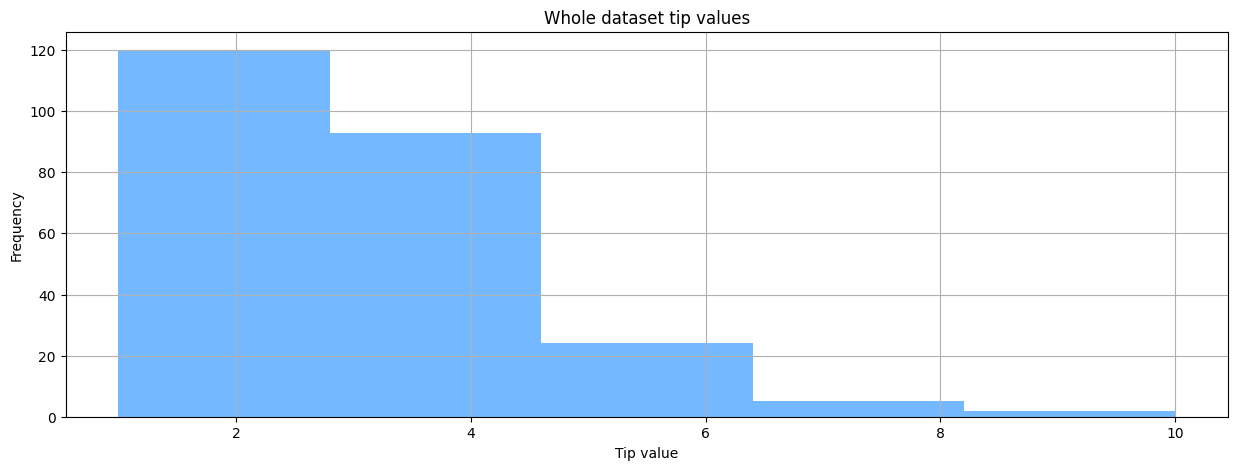

In [ ]:
# YOUR CODE
plt.figure(figsize = (15, 5))
plt.hist(df['tip'], bins = 5, color = '#74b9ff')

plt.xlabel('Tip value')
plt.ylabel('Frequency')
plt.title('Whole dataset tip values')

plt.grid(True)
plt.show()

##### **🚬 Smokers tips histogram**

Plot the histogram for smokers tips distribution.

<u>Use the following settings:</u>
* Size: `15 x 5`
* Color: `#ff7675`
* X-axis label: `Tip value`
* Y-axis label: `Frequency`
* Chart title: `Smokers tip values`
* Gridlines: `show`

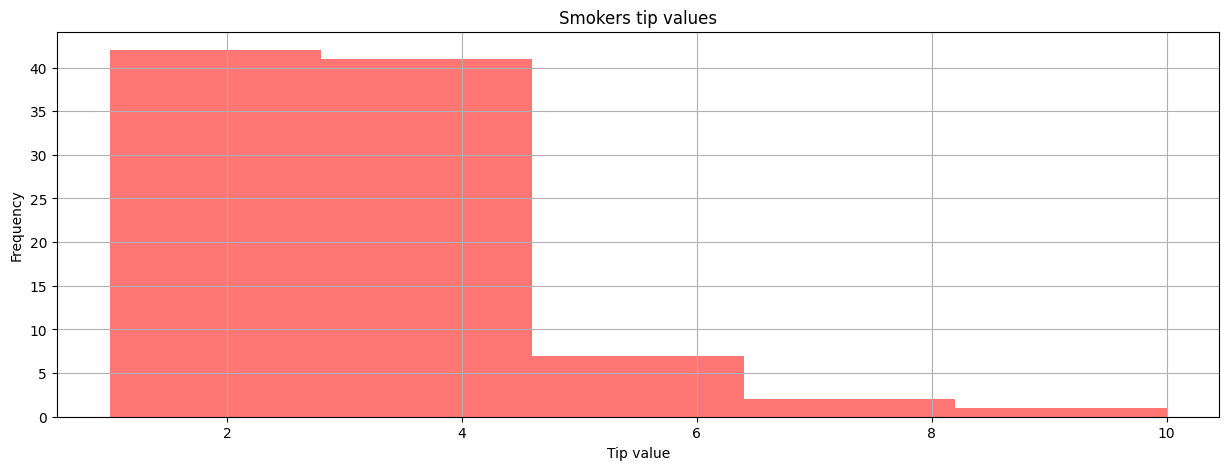

In [ ]:
# YOUR CODE
plt.figure(figsize = (15, 5))
plt.hist(smokers_df['tip'], bins = 5, color = '#ff7675')

plt.xlabel('Tip value')
plt.ylabel('Frequency')
plt.title('Smokers tip values')

plt.grid(True)
plt.show()

##### **🚭 Non-smokers tips histogram**

Plot the histogram for non-smokers tips distribution.

<u>Use the following settings:</u>
* Size: `15 x 5`
* Color: `#55efc4`
* X-axis label: `Tip value`
* Y-axis label: `Frequency`
* Chart title: `Non-smokers tip values`
* Gridlines: `show`

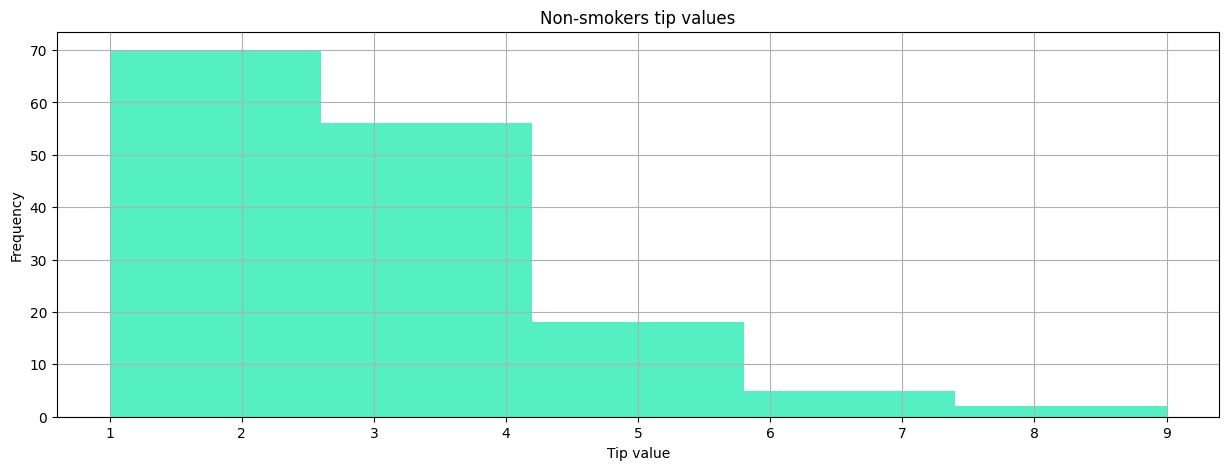

In [ ]:
# YOUR CODE
plt.figure(figsize = (15, 5))
plt.hist(non_smokers_df['tip'], bins = 5, color = '#55efc4')

plt.xlabel('Tip value')
plt.ylabel('Frequency')
plt.title('Non-smokers tip values')

plt.grid(True)
plt.show()

##### **⭐ Extra-task with a higher difficulty**

Plot all 3 charts in a row in the same cell:

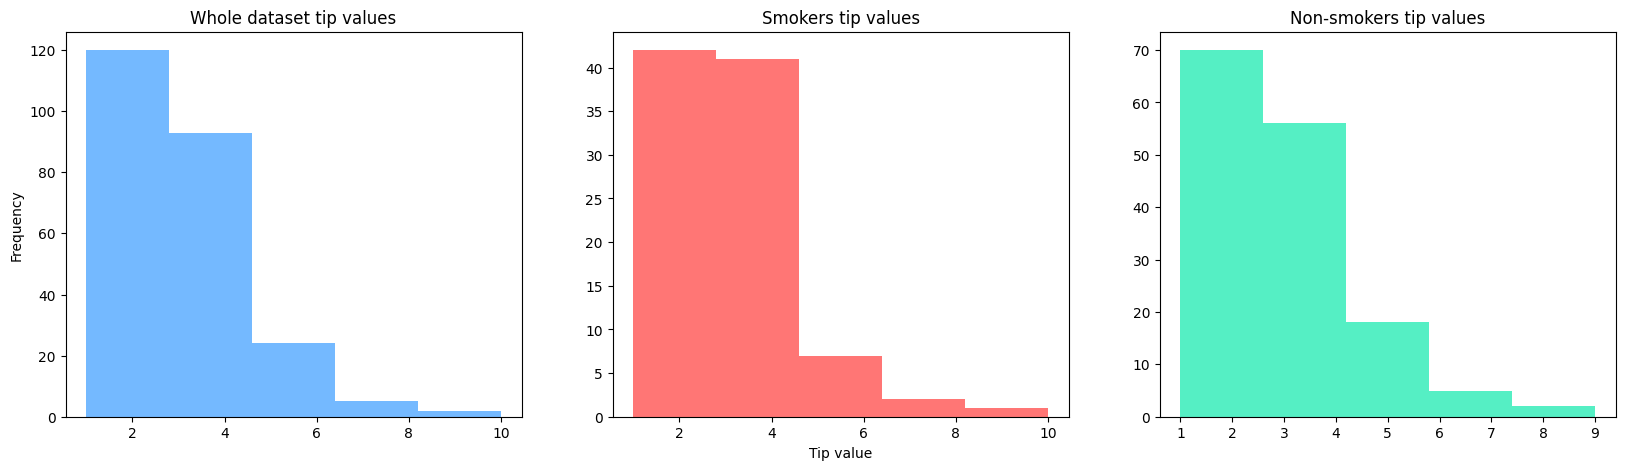

In [ ]:
# YOUR CODE
figure, axis = plt.subplots(1, 3, figsize = (20, 5))

axis[0].hist(df['tip'], bins = 5, color = '#74b9ff')
axis[0].set_title('Whole dataset tip values')
axis[0].set_ylabel('Frequency')

axis[1].hist(smokers_df['tip'], bins = 5, color = '#ff7675')
axis[1].set_title('Smokers tip values')
axis[1].set_xlabel('Tip value')

axis[2].hist(non_smokers_df['tip'], bins = 5, color = '#55efc4')
axis[2].set_title('Non-smokers tip values')

plt.show()


##### **📝 Conclusion**

**Insights based on distribution comparison:**

---

**1.** The frequency of tip amounts for non-smokers is more concentrated in the medium range (around 2-4) compared to smokers, where tip values are more widely distributed and tend to be lower (mostly in the 1-3 range). This suggests that non-smoking customers may be more generous or consistent with tipping.

**2.** The overall dataset shows a right-skewed distribution of tips, with most values falling between 2-6, but a few cases of very high tips (8-10). Meanwhile, the smokers' group has a thinner distribution with fewer high tips, while non-smokers have a denser distribution around medium values, along with some instances of high tips (6-9).

**General conclusion:** There is a clear difference in tipping behavior between smoking and non-smoking customers. Non-smokers tend to tip more consistently and generously, while smokers tip less and more variably. This could be related to spending habits, cultural factors, or personal preferences. Businesses may consider tailored strategies to encourage tipping based on customer groups.

### **👨👩 Do males give more tips?**

Perform the same steps based on the column **sex**.

In [13]:
def compute_mct(df, dimension, value_col = 'tip'):

    all_vals_dict = {}
    all_vals_dict['Common'] = {'min': df[value_col].min(), 'max': df[value_col].max(), 'mean': df[value_col].mean(), 'median': df[value_col].median()}

    if dimension == 'day':
        df['day_type'] = df['day'].apply(lambda x: 'Weekend' if x in ['Sat', 'Sun'] else 'Weekday')
        groups = ['Weekday', 'Weekend']
    else:
        groups = df[dimension].unique()

    for group in groups:
        group_df = df[df[dimension] == group] if dimension != 'day' else df[df['day_type'] == group]
        all_vals_dict[group] = {'min': group_df[value_col].min(), 'max': group_df[value_col].max(), 'mean': group_df[value_col].mean(), 'median': group_df[value_col].median()}

    return pd.DataFrame(all_vals_dict)

In [3]:
def plot_histograms(df, dimension, value_col = 'tip', bins = 5):

    color_palette = ['#ff7675', '#55efc4', '#fdcb6e', '#6c5ce7', '#00cec9']

    if dimension == 'day':
        df['day_type'] = df['day'].apply(lambda x: 'Weekend' if x in ['Sat', 'Sun'] else 'Weekday')
        groups = ['Weekday', 'Weekend']
    else:
        groups = df[dimension].unique()

    figure, axis = plt.subplots(1, len(groups) + 1, figsize = (6 * (len(groups) + 1), 5))

    axis[0].hist(df[value_col], bins=bins, color='#74b9ff')
    axis[0].set_title('Whole dataset tip values')
    axis[0].set_ylabel('Frequency')

    for i, group in enumerate(groups):
        group_df = df[df[dimension] == group] if dimension != 'day' else df[df['day_type'] == group]
        axis[i + 1].hist(group_df[value_col], bins=bins, color = color_palette[i % len(color_palette)])
        axis[i + 1].set_title(f'{group} tip values')
        if i == 0:
            axis[i + 1].set_xlabel('Tip value')

    plt.show()

In [14]:
compute_mct(df, 'sex')

,Common,Female,Male
min,1.000000,1.000000,1.000000
max,10.000000,6.500000,10.000000
mean,2.998279,2.833448,3.089618
median,2.900000,2.750000,3.000000


**Insights based on measures of central tendency comparison:**

**1**. Female customers tend to tip more consistently and at a lower average amount compared to male customers (2.83 vs. 3.09).

**2**. The tip data tends to cluster around the average (approximately 2.9 - 3.0) for both male and female customers.

**General conclusion:** Male customers are inclined to tip higher but with greater variability, while female customers tip more consistently at a slightly lower rate. The common tip amount fluctuates around 3.0.

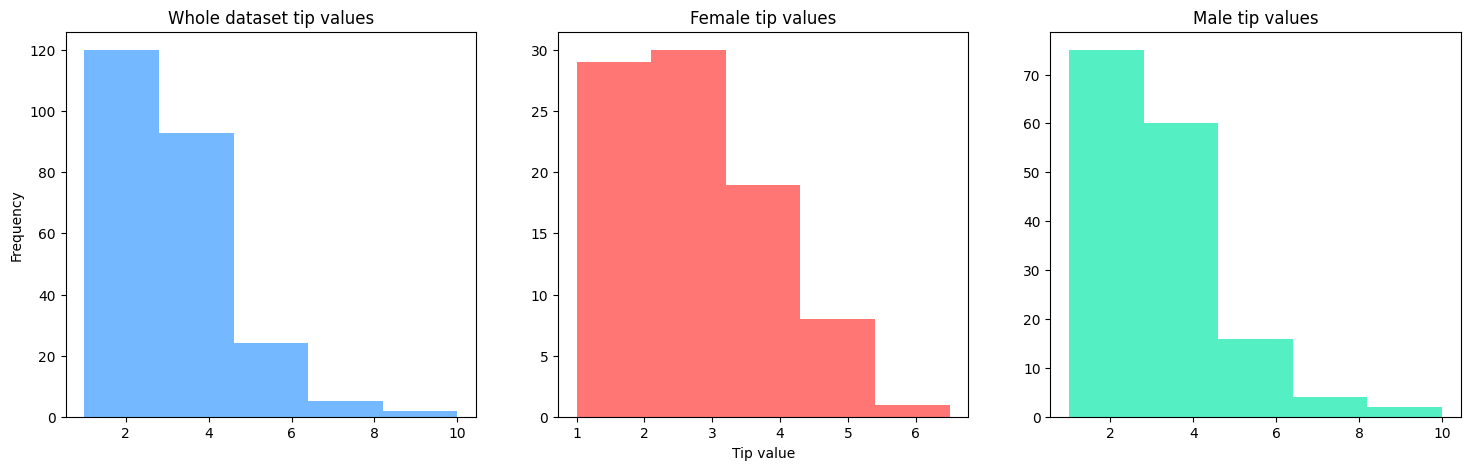

In [15]:
plot_histograms(df, 'sex')

##### **📝 Conclusion**

**Insights based on distribution comparison:**

---

**1.** Different Tip Value Distributions Across Groups: In the whole dataset and the male customer group, there appear to be two frequency peaks, one at a lower level (around 1-2) and another at a higher level (around 3-5).

**2.** Conversely, in the female customer group, the highest frequency is concentrated at a lower level (around 2-3) and gradually decreases at higher levels, indicating a tendency to tip less and fewer high-value tips.

**General conclusion:** Tipping behavior varies significantly between male and female customers. Male customers tend to tip across a wider range of values, including larger amounts, as shown by the broader distribution and potentially multiple frequency peaks. In contrast, female customers tend to tip at lower amounts with less significant variation in tip value. This might suggest differences in spending habits or perceptions of tipping between the two genders.

### **📆 Do weekends bring more tips?**

Perform the same steps based on the column **day**.

In [16]:
compute_mct(df, 'day')

,Common,Weekday,Weekend
min,1.000000,1.00000,1.000000
max,10.000000,6.70000,10.000000
mean,2.998279,2.76284,3.115276
median,2.900000,2.50000,3.000000


**Insights based on measures of central tendency comparison:**

**1**. Weekend tips are higher (both average and median) and have a greater potential for larger amounts compared to weekday tips.

**2**. Weekday tips tend to be lower but more stable, with less significant fluctuation.

**General conclusion:** Customers tip more generously on weekends than on weekdays, while weekday tips are somewhat more consistent at a lower level.

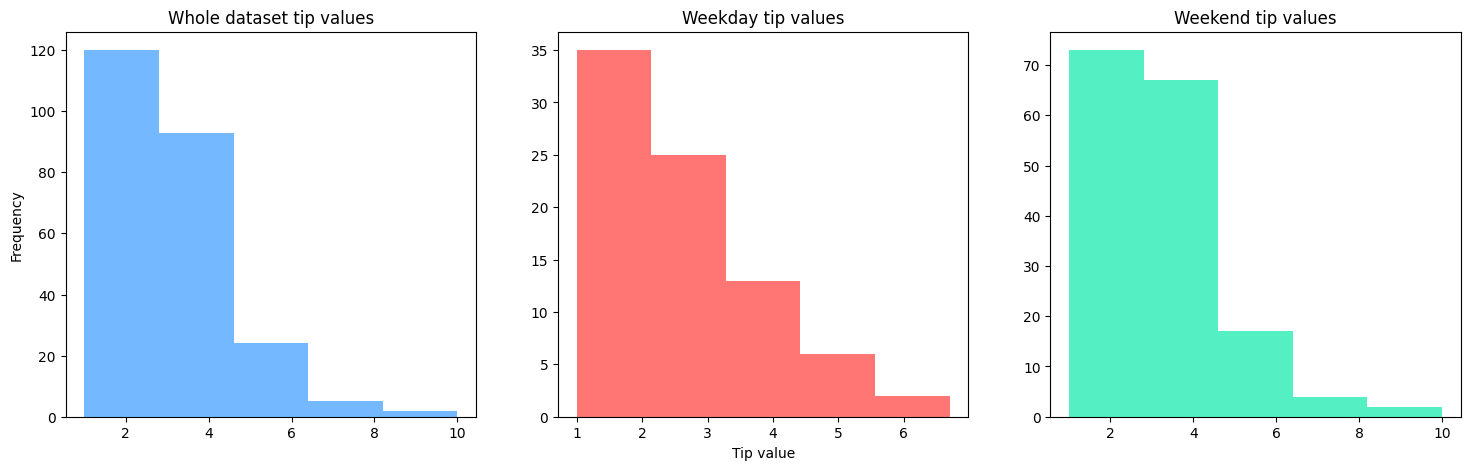

In [ ]:
plot_histograms(df, 'day')

##### **📝 Conclusion**

**Insights based on distribution comparison:**

---

**1.** The histograms clearly show a difference in the distribution of tip values between weekdays and weekends. On weekdays, the highest frequency is concentrated at lower tip values (around 1-2), and it decreases rapidly at higher levels. In contrast, on weekends, while the highest frequency is still at the lower levels, there's a significant amount of tips at the mid-range (around 3-5), indicating that customers tend to tip more generously on weekends.

**2.** The weekend histogram shows a more pronounced presence of higher-value tips (above 5) compared to the weekday histogram. Although the frequency isn't as high as the lower amounts, there are still noticeable bars representing significant tips, which is less evident in the weekday data. This reinforces the observation that customers tend to tip more and give larger tips on weekends.

**General conclusion:** The time of the week significantly influences customer tipping behavior. On weekends, customers tend to tip higher, with the distribution showing more tips in the mid-range and even higher values compared to weekdays. Conversely, on weekdays, the majority of customers tend to tip at lower amounts, and there are fewer high-value tips.

### **🕑 Do dinners bring more tips?**

Perform the same steps based on the column **time**.

In [ ]:
compute_mct(df, 'time')

,Common,Dinner,Lunch
min,1.000000,1.00000,1.250000
max,10.000000,10.00000,6.700000
mean,2.998279,3.10267,2.728088
median,2.900000,3.00000,2.250000


**Insights based on measures of central tendency comparison:**

**1**. Average and median tips during dinner are higher than during lunch, indicating customers tend to tip more in the evening.

**2**. The maximum tip amount at lunch is significantly lower than at dinner and in the overall dataset, suggesting a lower likelihood of receiving very large tips during lunchtime.

**General conclusion:** Dinner service at this restaurant generally results in higher tip amounts and a greater potential for larger tips compared to lunch service.

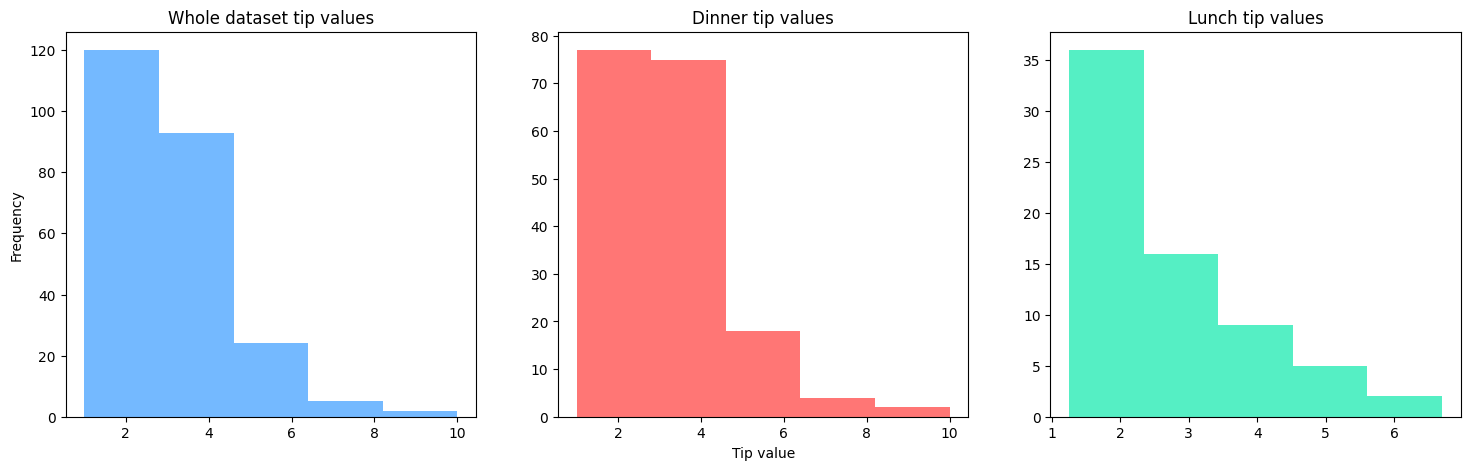

In [ ]:
plot_histograms(df, 'time')

##### **📝 Conclusion**

**Insights based on distribution comparison:**

---

**1.** Clear Difference in Tip Distribution Between Lunch and Dinner. The histograms show a significantly higher frequency of low tips (around 1-2) during lunch compared to dinner. Conversely, the frequency of mid-range (around 3-5) and higher tips tends to be greater during dinner. This indicates that customers are inclined to tip less during lunch and more generously during dinner.

**2.** Limitation of Large Tips During Lunch. The lunch histogram shows a sharp decline in frequency at higher tip values, with very few or no tips exceeding 6. This contrasts with the dinner and whole dataset histograms, where higher-value tips still appear (albeit with lower frequency). This suggests that receiving large tips during lunchtime is quite rare.

**General conclusion:** The mealtime has a substantial impact on customer tipping behavior. Dinner service is generally associated with higher tip amounts and a greater likelihood of receiving mid-range and higher tips compared to lunch service. Lunch service tends to receive lower tips, and large-value tips are very infrequent.